<a href="https://colab.research.google.com/github/Paritosh025/text-sentiment-neural-network/blob/main/new_review3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset link
# https://drive.google.com/drive/folders/1JklD3Jbgd0Hr7exNuCDGc5ZyWVt3CRlh?usp=sharing

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# dataframe = pd.read_csv("/content/drive/MyDrive/archive (1)/1429_1.csv",usecols=['id','reviews.rating', 'reviews.text'], encoding = 'utf8')
# dataframe.head()

Mounted at /content/drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
dataframe = pd.read_csv("/content/drive/MyDrive/Review3/1429_1.csv", usecols=['reviews.text'],encoding='utf8')
dataframe.head()

,reviews.text
0,This product so far has not disappointed. My c...
1,great for beginner or experienced person. Boug...
2,Inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...
4,I bought this for my grand daughter when she c...


In [ ]:
dataframe.isnull().sum()

reviews.text    1
dtype: int64

In [ ]:
dataframe = dataframe.fillna(method = "ffill",axis = 0)

In [ ]:
dataframe.isnull().sum()

reviews.text    0
dtype: int64

In [ ]:
import re
import string
def cleanstr(text):
    text= str(text).lower()
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text) # extra white space removal
    text = re.sub(' \d+', ' ', text) # removing 0-9
    return text


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
# Tokenize means to convert sentences into words
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt') 
stopwords = set(stopwords.words('english'))
stopwords.remove('not')
def remove_stopwords(text):
  token = word_tokenize(text)
  token_without_stopwords = []
  for words in token:
    if words not in stopwords:
      token_without_stopwords.append(words)
  
  text = " ".join(token_without_stopwords)
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.corpus import wordnet
# wordnet is simply a large database of english
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
# toperform lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4') # to run lemmatizer
lemmatizer  = WordNetLemmatizer()
def lemmatize(text):
  token = word_tokenize(text)
  word_pos_tags = nltk.pos_tag(token)
  token_with_lemmatizer = []
  for idx, tag in enumerate(word_pos_tags):
    token_with_lemmatizer.append(lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])))
  
  text = " ".join(token_with_lemmatizer)
  return text


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def polarity(text):
  sia= SentimentIntensityAnalyzer()
  dic = sia.polarity_scores(text)
  return dic.get('compound')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Giving a range
def sentiments(val):
  if val>=0.25:
    return 1
  elif val<=-0.25:
    return -1
  else:
    return 0

In [ ]:
dataframe['reviews.text'] = dataframe['reviews.text'].apply(cleanstr)
# removing all punctuatuins, numbers, extra whitespaces.
dataframe['reviews.text'] = dataframe['reviews.text'].apply(remove_stopwords)
dataframe['reviews.text'] = dataframe['reviews.text'].apply(lemmatize)
# dataframe['reviews.text'] = dataframe['reviews.text'].apply(word_extraction)
dataframe['reviews.polarity'] = dataframe['reviews.text'].apply(polarity)
dataframe['reviews.sentiment'] = dataframe['reviews.polarity'].apply(sentiments)

dataframe.head()

,reviews.text,reviews.polarity,reviews.sentiment
0,product far not disappointed child love use li...,0.6690,1
1,great beginner experience person buy gift love,0.9042,1
2,inexpensive tablet use learn step nabi thrill ...,0.3612,1
3,fire hd two week love tablet great value prime...,0.9909,1
4,buy grand daughter come visit set user enter a...,0.9371,1


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviews.text       34660 non-null  object 
 1   reviews.polarity   34660 non-null  float64
 2   reviews.sentiment  34660 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 812.5+ KB


### Rough Model Implementation


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train,x_test, y_train, y_test = train_test_split(dataframe['reviews.text'], dataframe['sentiment'], test_size = 0.33, random_state = 42)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(stop_words = 'english')
# x_train = cv.fit_transform(x_train).toarray()
# x_test = cv.fit_transform(x_test).toarray()

In [ ]:
# import numpy as np
# np.any(np.isnan(y_train))

In [ ]:
# np.all(np.isfinite(y_train))

In [ ]:
# x = x[np.all(np.isfinite(x), axis=1)]

In [ ]:
# from sklearn.naive_bayes import MultinomialNB

# model = MultinomialNB()
# model.fit(x_train,y_train)

In [ ]:
# model.score(x_test, y_test)

# Model Implementation 

In [ ]:
import numpy as np
index = dataframe.index
dataframe['random_number'] = np.random.randn(len(index))
train = dataframe[dataframe['random_number'] <= 0.8]
test = dataframe[dataframe['random_number'] > 0.8]


In [ ]:
train.head()

,reviews.text,reviews.polarity,reviews.sentiment,random_number
0,product far not disappointed child love use li...,0.6690,1,-1.520502
2,inexpensive tablet use learn step nabi thrill ...,0.3612,1,-0.602289
3,fire hd two week love tablet great value prime...,0.9909,1,0.325014
4,buy grand daughter come visit set user enter a...,0.9371,1,-0.045838
5,amazon fire inch tablet perfect size purchase ...,0.7096,1,-1.113317


In [ ]:
test.head()

,reviews.text,reviews.polarity,reviews.sentiment,random_number
1,great beginner experience person buy gift love,0.9042,1,1.535277
6,great e read go nice light weight price point ...,0.8885,1,1.586547
16,nice reader almost perfect want need good bargain,0.8729,1,1.466656
21,preloaded reading app kindle expandable apps p...,0.5719,1,1.921569
38,buy tablet family not disappointed,0.3724,1,1.460597


In [ ]:
train.head()
Y_train = train['reviews.sentiment']
Y_test = test['reviews.sentiment']

In [ ]:
# for bag of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

In [ ]:
cv = CountVectorizer() # initialize count vectorizer
X_train  = cv.fit_transform(train['reviews.text'])
X_test = cv.transform(test['reviews.text'])

In [ ]:
X_train =  X_train.toarray()
X_test = X_test.toarray()

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# Dense is first hidden layer

In [ ]:
model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 8, activation = 'relu' ))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
history = model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
853/853 [==============================] - 6s 6ms/step - loss: 0.2700 - accuracy: 0.8823
Epoch 2/10
853/853 [==============================] - 5s 6ms/step - loss: 0.1036 - accuracy: 0.8980
Epoch 3/10
853/853 [==============================] - 5s 6ms/step - loss: -0.0206 - accuracy: 0.9051
Epoch 4/10
853/853 [==============================] - 5s 6ms/step - loss: -0.1901 - accuracy: 0.9077
Epoch 5/10
853/853 [==============================] - 5s 6ms/step - loss: -0.4538 - accuracy: 0.9098
Epoch 6/10
853/853 [==============================] - 6s 7ms/step - loss: -0.8573 - accuracy: 0.9102
Epoch 7/10
853/853 [==============================] - 5s 6ms/step - loss: -1.4192 - accuracy: 0.9093
Epoch 8/10
853/853 [==============================] - 5s 6ms/step - loss: -2.2020 - accuracy: 0.9095
Epoch 9/10
853/853 [==============================] - 5s 6ms/step - loss: -3.2647 - accuracy: 0.9082
Epoch 10/10
853/853 [==============================] - 5s 6ms/step - loss: -4.5848 - accuracy

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                163152    
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 163,297
Trainable params: 163,297
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss, test_acc  = model.evaluate(X_test,Y_test)

231/231 [==============================] - 1s 3ms/step - loss: -1.5943 - accuracy: 0.8887


In [ ]:
print(test_loss)
print(test_acc)

-1.5943024158477783
0.8886930346488953


# Model Deployment


In [ ]:
text="not last long cheap battery happy"

text=cleanstr(text)
text=remove_stopwords(text)
text=(lemmatize(text))
print(text)

not last long cheap battery happy


In [ ]:
vec=cv.transform([text])
vec = vec.toarray()
print(vec)
# between 0-1
pre= model.predict(vec)
print(pre)
if pre<=0.35:
    print("Negative")
elif pre<=0.65:
    print("Neutral")
else:
    print("Positive")

[[0 0 0 ... 0 0 0]]
1/1 [==============================] - 0s 82ms/step
[[6.2240275e-18]]
Negative


In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Review3/model_save.hdf5')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/Review3/model_save.hdf5')

In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Review3/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', usecols = ['reviews.rating','reviews.text'], encoding = 'utf8')
dataset.head()

,reviews.rating,reviews.text
0,3,I order 3 of them and one of the item is bad q...
1,4,Bulk is always the less expensive way to go fo...
2,5,Well they are not Duracell but for the price i...
3,5,Seem to work as well as name brand batteries a...
4,5,These batteries are very long lasting the pric...


In [ ]:
dataset['reviews.text'] = dataset['reviews.text'].apply(cleanstr)
dataset['reviews.text'] = dataset['reviews.text'].apply(remove_stopwords)
dataset['reviews.text'] = dataset['reviews.text'].apply(lemmatize)
dataset.head()

,reviews.rating,reviews.text
0,3,order one item bad quality miss backup spring ...
1,4,bulk always less expensive way go product like
2,5,well not duracell price happy
3,5,seem work well name brand battery much good price
4,5,battery long lasting price great


In [ ]:
dataset = dataset.fillna(method = "ffill",axis = 0)

In [ ]:
test = cv.transform(dataset['reviews.text'])

In [ ]:
test = test.toarray()

In [ ]:
dataset['result'] = loaded_model.predict(test)

886/886 [==============================] - 4s 4ms/step


In [ ]:
dataset.head()

,reviews.rating,reviews.text,result
0,3,order one item bad quality miss backup spring ...,0.000000
1,4,bulk always less expensive way go product like,0.998844
2,5,well not duracell price happy,0.103700
3,5,seem work well name brand battery much good price,0.999217
4,5,battery long lasting price great,0.998720


In [ ]:
def findout(data):
  if data < 0.35:
    return -1
  elif data > 0.65:
    return 1
  else:
    return 0

In [ ]:
dataset['reviews.sentiment'] = dataset['result'].apply(findout)

In [ ]:
dataset.head(10)

,reviews.rating,reviews.text,result,reviews.sentiment
0,3,order one item bad quality miss backup spring ...,0.000000e+00,-1
1,4,bulk always less expensive way go product like,9.988439e-01,1
2,5,well not duracell price happy,1.037003e-01,-1
3,5,seem work well name brand battery much good price,9.992167e-01,1
4,5,battery long lasting price great,9.987198e-01,1
5,5,buy lot battery christmas amazonbasics cell go...,1.000000e+00,1
6,5,ive not problame battery order past pleased,1.645657e-13,-1
7,5,well look cheap non rechargeable battery last ...,7.163673e-01,1
8,3,not hold amount high power juice like energize...,9.142404e-04,-1
9,4,amazonbasics aa aaa battery do well appear goo...,9.863197e-01,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


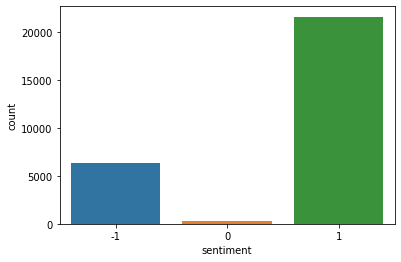

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(dataset['reviews.sentiment'])
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviews.rating     28332 non-null  int64  
 1   reviews.text       28332 non-null  object 
 2   result             28332 non-null  float32
 3   reviews.sentiment  28332 non-null  int64  
dtypes: float32(1), int64(2), object(1)
memory usage: 774.8+ KB


In [ ]:
dataset['reviews.sentiment'].value_counts()

 1    21601
-1     6389
 0      342
Name: reviews.sentiment, dtype: int64

In [ ]:
dataset.describe()

,reviews.rating,result,reviews.sentiment
count,28332.000000,28332.000000,28332.000000
mean,4.514048,0.764921,0.536919
std,0.934957,0.412396,0.836463
min,1.000000,0.000000,-1.000000
25%,4.000000,0.869789,1.000000
50%,5.000000,0.999971,1.000000
75%,5.000000,1.000000,1.000000
max,5.000000,1.000000,1.000000


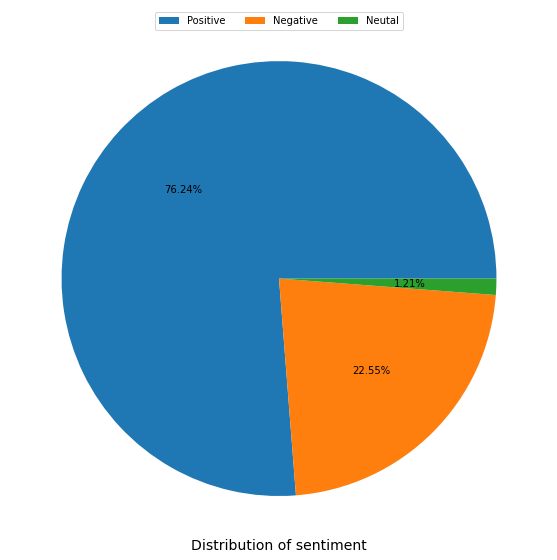

In [ ]:
plt.figure(figsize = (10, 10))
label=["Positive","Negative","Neutal"]
plt.pie(dataset['reviews.sentiment'].value_counts(), autopct='%0.2f%%')
plt.legend(label, ncol=6, loc=9)
plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.show()